In [3]:
import sqlite3 as sql
import pandas as pd


In [4]:
conn=sql.connect('database.sqlite')
conn

In [7]:
a=conn.execute('select * from Salaries')
a

In [10]:
pd.read_sql_query('select *from salaries',conn)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.71,198306.9,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737,182234.59,,326373.19,326373.19,2011,,San Francisco,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0,0,0,0,0.00,0.00,2014,,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,


In [12]:
def my_sql(q):
    return pd.read_sql_query(q,conn)

. Top 10 highest paid employees (by TotalPayBenefits)

In [14]:
q='''select employeename,totalpaybenefits from salaries order by TotalPayBenefits desc limit 10'''
my_sql(q)

,EmployeeName,TotalPayBenefits
0,NATHANIEL FORD,567595.43
1,GARY JIMENEZ,538909.28
2,David Shinn,510732.68
3,Amy P Hart,479652.21
4,William J Coaker Jr.,436224.36
5,Gregory P Suhr,425815.28
6,Joanne M Hayes-White,422353.40
7,Gregory P Suhr,418019.22
8,Joanne M Hayes-White,417435.10
9,Ellen G Moffatt,415767.94


2. Find which year has missing data of Employees with 'Not Provided'/ 'Not provided' .

In [16]:
q='''select year,employeename from salaries where EmployeeName="Not provided"'''
my_sql(q)

,Year,EmployeeName
0,2014,Not provided
1,2014,Not provided
2,2014,Not provided
3,2014,Not provided


3. Number of unique agencies

In [18]:
q='''select distinct agency from salaries'''
my_sql(q)

,Agency
0,San Francisco


4. Show Average BasePay, OvertimePay, and TotalPay for year 2011

In [20]:
q='''select avg(Basepay),avg(OvertimePay),avg(TotalPay),year from salaries where year=2011'''
my_sql(q)

,avg(Basepay),avg(OvertimePay),avg(TotalPay),Year
0,63595.956517,4531.065429,71744.103871,2011


5. Plot the top 10 job titles with the highest TotalPay in 2014.

In [53]:
q='''select jobtitle , Totalpay , year from salaries where  year=2014 order by totalpay desc limit 10 '''
my_sql(q)

,JobTitle,TotalPay,Year
0,Deputy Chief 3,471952.64,2014
1,Asst Med Examiner,390111.98,2014
2,Asst Med Examiner,344187.46,2014
3,Chief Investment Officer,339653.70,2014
4,"Battalion Chief, Fire Suppress",335484.96,2014
5,Asst Chf of Dept (Fire Dept),329390.54,2014
6,Chief of Police,326716.76,2014
7,"Chief, Fire Department",326233.44,2014
8,Commander 3,322143.10,2014
9,Senior Physician Specialist,311650.36,2014


<Axes: ylabel='JobTitle'>

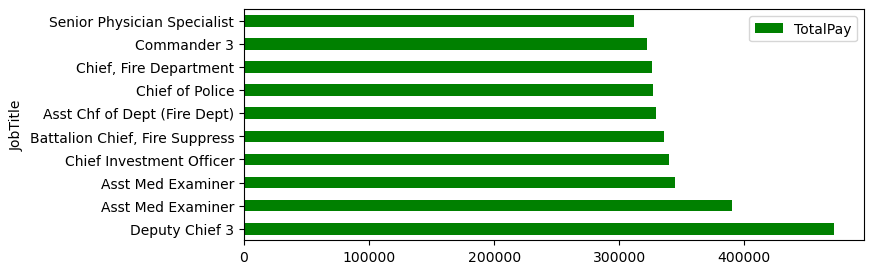

In [75]:
a=pd.read_sql_query(q,conn)
a.plot(kind='barh', x='JobTitle', y='TotalPay', color='green', figsize=(8,3))

6. Which job titles have overtime pay exceeding $150,000 exluding 'Not provided'

In [77]:
q='''select jobtitle, overtimepay from salaries where overtimepay>150000 and employeename!="Not provided" '''
my_sql(q)

,JobTitle,OvertimePay
0,CAPTAIN III (POLICE DEPARTMENT),245131.88
1,"Lieutenant, Fire Suppression",220909.48
2,EMT/Paramedic/Firefighter,192424.49
3,Firefighter,160418.47
4,"Lieutenant, Fire Suppression",163477.81
5,Deputy Sheriff,196689.18
6,Deputy Sheriff,156077.49
7,Deputy Sheriff,173547.73
8,Deputy Sheriff,173178.23
9,Deputy Sheriff,169659.92


7. Find all employees whose job titles contain the word “CHIEF”

In [81]:
q = '''select jobtitle from Salaries where jobtitle like "%CHIEF%" '''
my_sql(q)

,JobTitle
0,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)"
1,ASSISTANT DEPUTY CHIEF II
2,"BATTALION CHIEF, (FIRE DEPARTMENT)"
3,"BATTALION CHIEF, (FIRE DEPARTMENT)"
4,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)"
...,...
622,Chief Deputy Adlt Probation Of
623,Chief Clerk
624,Chief Nursery Specialist
625,Chief Preparator


8. Count how many employees have job titles containing “ENGINEER” and “Fire” in year 2012 and 2013

In [93]:
q='''select count(Jobtitle) from Salaries where jobtitle like '%ENGINEER%' AND jobtitle like '%Fire%' and year IN (2012,2013)'''
my_sql(q)

,count(Jobtitle)
0,16


9. Distinct job titles starting with "CAPTAIN"

In [95]:
q='''select distinct jobtitle from salaries where jobtitle like 'CAPTAIN%' '''
my_sql(q)

,JobTitle
0,CAPTAIN III (POLICE DEPARTMENT)
1,"CAPTAIN, EMERGENCYCY MEDICAL SERVICES"
2,"CAPTAIN, FIRE SUPPRESSION"
3,"CAPTAIN, BUREAU OF FIRE PREVENTION AND PUBLIC ..."
4,Captain 3
5,"Captain, Fire Suppression"
6,"Captain, Emergency Med Svcs"
7,"Captain, (Fire Department)"


10. Employees having basepay > 50k and totalpay < 150000 exlucding 'Not Provided'

In [103]:
q='''select basepay,totalpay from salaries where basepay>50000 and totalpay<150000 and basepay!="Not Provided"
and totalpay!="Not Provided"'''
my_sql(q)

,BasePay,TotalPay
0,112380.37,149987.24
1,149975.8,149975.80
2,119703.78,149970.85
3,105934.65,149964.61
4,106065.2,149952.47
...,...,...
87255,52428.53,53458.31
87256,52389.79,52555.44
87257,51668.7,51785.23
87258,51673.98,51673.98


In [22]:
q='''select count(employeename) as 'Employee count', jobtitle from salaries 
    group by 2 order by 1 desc '''
my_sql(q)

,Employee count,JobTitle
0,7036,Transit Operator
1,4389,Special Nurse
2,3736,Registered Nurse
3,2518,Public Svc Aide-Public Works
4,2421,Police Officer 3
...,...,...
2154,1,"AIRPORT ASSISTANT DEPUTY DIRECTOR, OPERATIONS"
2155,1,"AIRPORT ASSISTANT DEPUTY DIRECTOR, BUSINESS AD..."
2156,1,"ADMINISTRATOR, SFGH MEDICAL CENTER"
2157,1,ACUPUNCTURIST


In [32]:
q='''select count(employeename) as 'Employee count',year from salaries 
    group by 2 order by 1 desc '''
my_sql(q)

,Employee count,Year
0,38123,2014
1,37606,2013
2,36766,2012
3,36159,2011


In [34]:
q='''select AVG(totalpay) ,jobtitle from salaries group by 2 order by 1 desc '''
my_sql(q)

,AVG(totalpay),JobTitle
0,399211.275000,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
1,339653.700000,Chief Investment Officer
2,329183.646667,Chief of Police
3,325971.683333,"Chief, Fire Department"
4,307899.460000,DEPUTY DIRECTOR OF INVESTMENTS
...,...,...
2154,25.760000,"Commissioner 16.700c, No Pay"
2155,0.000000,Public Safety Comm Tech
2156,0.000000,Not provided
2157,0.000000,IS Technician Assistant


In [38]:
q='''select max(totalpay) ,employeename,year from salaries group by 3 order by 1 desc '''
my_sql(q)

,max(totalpay),EmployeeName,Year
0,567595.43,NATHANIEL FORD,2011
1,471952.64,David Shinn,2014
2,362844.66,Gary Altenberg,2012
3,347102.32,Samson Lai,2013


<Axes: ylabel='EmployeeName'>

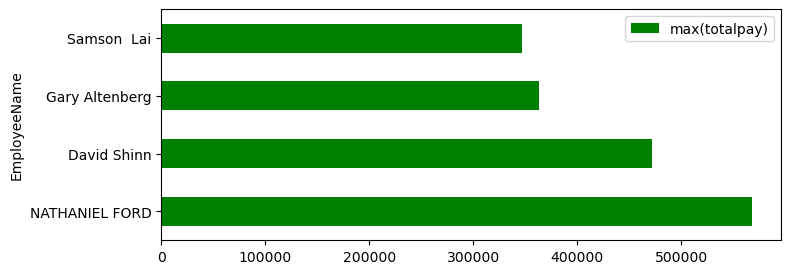

In [48]:
a=pd.read_sql_query(q,conn)
a.plot(kind='barh', x='EmployeeName', y='max(totalpay)', color='green', figsize=(8,3))

In [58]:
q='''select SUM(TOTALPAY) as Total, year, jobtitle  from Salaries group by year, jobtitle '''
my_sql(q)

,Total,Year,JobTitle
0,3654960.14,2011,ACCOUNT CLERK
1,237146.34,2011,ACCOUNTANT
2,1393523.66,2011,ACCOUNTANT INTERN
3,67594.40,2011,ACUPUNCTURIST
4,5947802.68,2011,ADMINISTRATIVE ANALYST
...,...,...,...
4132,190575.90,2014,Wire Rope Cable Maint Sprv
4133,340136.68,2014,Worker's Comp Supervisor 1
4134,1836547.84,2014,Worker's Compensation Adjuster
4135,1792404.84,2014,X-Ray Laboratory Aide


In [64]:
q='''select jobtitle , count(employeename) count, totalpay from salaries 
    where totalpay>200000
    group by 1
    having count > 3'''
my_sql(q)
    

,JobTitle,count,TotalPay
0,ANESTHETIST,8,238879.20
1,ASSISTANT DEPUTY CHIEF II,4,316285.74
2,Anesthetist,33,249803.78
3,Assistant Chief Attorney 1,36,204674.60
4,Assistant Chief Attorney 2,11,214837.50
...,...,...,...
69,Sergeant 3,96,233985.76
70,Sheriff's Sergeant,6,217643.97
71,Supervising Physician Spec,33,214572.59
72,TRANSIT SUPERVISOR,7,230239.98


In [70]:
q='''select employeename, overtimepay ,
    CASE
    when overtimepay>100000 then 'OVERTIMEWORKER'
    ELSE
    'regular worker'
END as workertype
from salaries'''
my_sql(q)

,EmployeeName,OvertimePay,workertype
0,NATHANIEL FORD,0,regular worker
1,GARY JIMENEZ,245131.88,OVERTIMEWORKER
2,ALBERT PARDINI,106088.18,OVERTIMEWORKER
3,CHRISTOPHER CHONG,56120.71,regular worker
4,PATRICK GARDNER,9737,regular worker
...,...,...,...
148649,Roy I Tillery,0,regular worker
148650,Not provided,Not Provided,OVERTIMEWORKER
148651,Not provided,Not Provided,OVERTIMEWORKER
148652,Not provided,Not Provided,OVERTIMEWORKER


In [74]:
q = '''SELECT EmployeeName, TotalPay,
    CASE
        WHEN TotalPay > 100000 THEN 'Executive level'
        WHEN TotalPay BETWEEN 50000 AND 99999 THEN 'Medium paying job'
        ELSE 'Low paying job'
    END AS JobLevelType
FROM Salaries'''
my_sql(q)

,EmployeeName,TotalPay,JobLevelType
0,NATHANIEL FORD,567595.43,Executive level
1,GARY JIMENEZ,538909.28,Executive level
2,ALBERT PARDINI,335279.91,Executive level
3,CHRISTOPHER CHONG,332343.61,Executive level
4,PATRICK GARDNER,326373.19,Executive level
...,...,...,...
148649,Roy I Tillery,0.00,Low paying job
148650,Not provided,0.00,Low paying job
148651,Not provided,0.00,Low paying job
148652,Not provided,0.00,Low paying job
